Setting up the environment

In [64]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers

Loading the IMDB dataset

In [66]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [5]:
# Decoding reviews back to text

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


Preparing the data

In [23]:

# Encoding the integer sequences via multi-hot encoding

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
     

In [26]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Building your model

In [27]:
#  Model definition
from tensorflow import keras
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [31]:
# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5515 - accuracy: 0.7644 - val_loss: 0.4346 - val_accuracy: 0.8525
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3612 - accuracy: 0.8875 - val_loss: 0.3440 - val_accuracy: 0.8779
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2716 - accuracy: 0.9136 - val_loss: 0.3305 - val_accuracy: 0.8644
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2188 - accuracy: 0.9301 - val_loss: 0.2780 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1814 - accuracy: 0.9418 - val_loss: 0.2852 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1568 - accuracy: 0.9501 - val_loss: 0.2792 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1345 - accuracy: 0.9575 - val_loss: 0.2871 - val_accuracy: 0.8849
Epoch 8/20
30

In [33]:
# Training your model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.0187 - accuracy: 0.9972 - val_loss: 0.5415 - val_accuracy: 0.8706
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0148 - accuracy: 0.9982 - val_loss: 0.5602 - val_accuracy: 0.8704
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0118 - accuracy: 0.9991 - val_loss: 0.5811 - val_accuracy: 0.8706
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0117 - accuracy: 0.9981 - val_loss: 0.6035 - val_accuracy: 0.8693
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0065 - accuracy: 0.9998 - val_loss: 0.6239 - val_accuracy: 0.8674
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0101 - accuracy: 0.9983 - val_loss: 0.6483 - val_accuracy: 0.8671
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.7018 - val_accuracy: 0.8613
Epoch 8/20
30

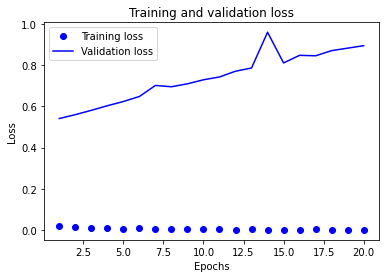

In [34]:
# Plotting the training and validation loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

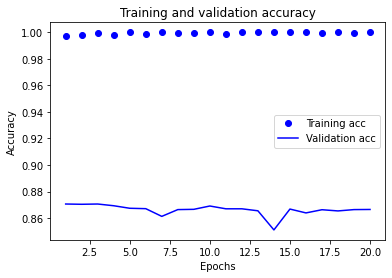

In [35]:

# Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
# Retraining a model from scratch

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 18ms/step - loss: 0.4908 - accuracy: 0.8028
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2865 - accuracy: 0.9015
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2194 - accuracy: 0.9242
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2836 - accuracy: 0.8870


Assginment questions
1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

In [37]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_12 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [38]:
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [39]:
# Training your model

history_11 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_12 = model_12.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5366 - accuracy: 0.7489 - val_loss: 0.3826 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3095 - accuracy: 0.8951 - val_loss: 0.3203 - val_accuracy: 0.8729
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2229 - accuracy: 0.9252 - val_loss: 0.2771 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1766 - accuracy: 0.9382 - val_loss: 0.3017 - val_accuracy: 0.8796
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1452 - accuracy: 0.9517 - val_loss: 0.2909 - val_accuracy: 0.8827
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1251 - accuracy: 0.9579 - val_loss: 0.3030 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1000 - accuracy: 0.9699 - val_loss: 0.3181 - val_accuracy: 0.8839
Epoch 8/20
30

In [ ]:
model_11.summary()
model_12.summary()

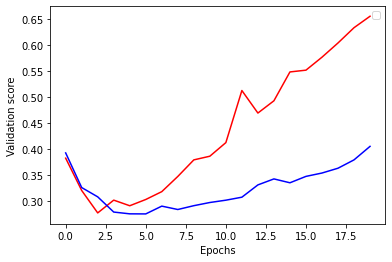

In [41]:
# Plotting the training and validation loss
history_dict_11 = history_11.history
history_dict_12 = history_12.history

plt.plot(history_11.history['val_loss'], 'r', history_12.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()

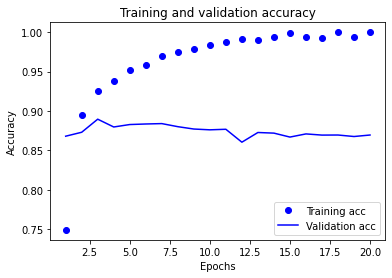

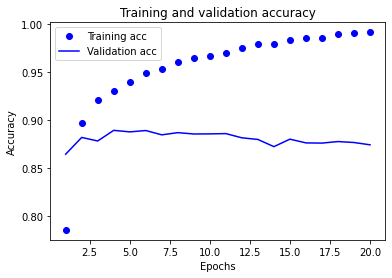

In [42]:

# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_11["accuracy"]
val_acc = history_dict_11["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#-------------------------------------------
#plot_loss(history_dict_11.history['loss'], history_dict_11.history['val_loss'])
#-------------------------------------------

plt.clf()
acc = history_dict_12["accuracy"]
val_acc = history_dict_12["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
     

2.Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

In [43]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [44]:
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [45]:
history_21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
     

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5235 - accuracy: 0.7527 - val_loss: 0.3613 - val_accuracy: 0.8716
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2999 - accuracy: 0.8913 - val_loss: 0.2938 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2257 - accuracy: 0.9173 - val_loss: 0.2738 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1805 - accuracy: 0.9355 - val_loss: 0.2952 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1483 - accuracy: 0.9483 - val_loss: 0.3055 - val_accuracy: 0.8793
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1195 - accuracy: 0.9611 - val_loss: 0.3020 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1025 - accuracy: 0.9657 - val_loss: 0.3310 - val_accuracy: 0.8828
Epoch 8/20
30

In [46]:
model_21.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                320032    
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 322,209
Trainable params: 322,209
Non-trainable params: 0
_________________________________________________________________


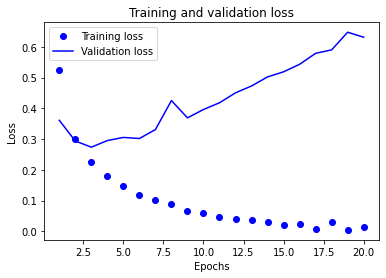

In [47]:
history_dict_21 = history_21.history
loss_values = history_dict_21["loss"]
val_loss_values = history_dict_21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

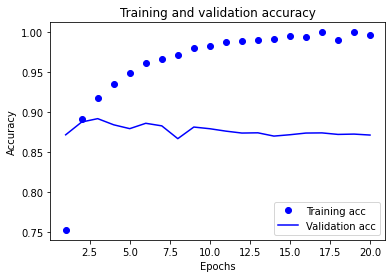

In [48]:

plt.clf()
acc = history_dict_21["accuracy"]
val_acc = history_dict_21["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
     

3. Try using the 'mse' loss function instead of 'binary_crossentropy'.

In [49]:
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [50]:

model_3.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
     

In [51]:

# Training your model

history_3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.1961 - accuracy: 0.7527 - val_loss: 0.1556 - val_accuracy: 0.7983
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1174 - accuracy: 0.8782 - val_loss: 0.1086 - val_accuracy: 0.8771
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0862 - accuracy: 0.9057 - val_loss: 0.0932 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0701 - accuracy: 0.9223 - val_loss: 0.0865 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0601 - accuracy: 0.9325 - val_loss: 0.0994 - val_accuracy: 0.8650
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0520 - accuracy: 0.9433 - val_loss: 0.0832 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0464 - accuracy: 0.9495 - val_loss: 0.0874 - val_accuracy: 0.8833
Epoch 8/20
30

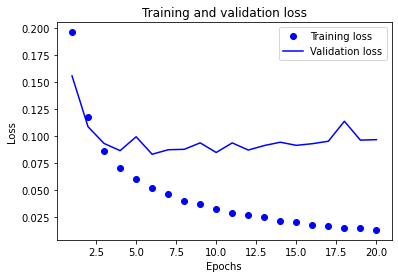

In [52]:
history_dict_3 = history_3.history
loss_values = history_dict_3["loss"]
val_loss_values = history_dict_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

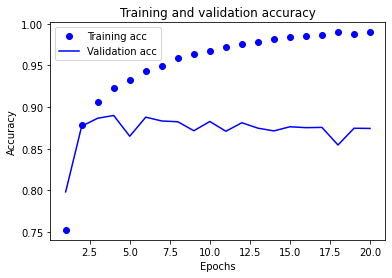

In [53]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_3["accuracy"]
val_acc = history_dict_3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of 'relu'

In [54]:
model_4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [55]:
model_4.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
     


In [56]:
history_4 = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.1663 - accuracy: 0.7783 - val_loss: 0.1248 - val_accuracy: 0.8433
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0904 - accuracy: 0.8960 - val_loss: 0.1006 - val_accuracy: 0.8645
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0673 - accuracy: 0.9184 - val_loss: 0.0857 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0521 - accuracy: 0.9390 - val_loss: 0.0833 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0447 - accuracy: 0.9449 - val_loss: 0.0858 - val_accuracy: 0.8812
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0380 - accuracy: 0.9547 - val_loss: 0.0875 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0325 - accuracy: 0.9612 - val_loss: 0.0922 - val_accuracy: 0.8789
Epoch 8/20
30

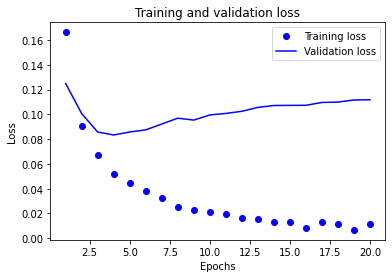

In [57]:
history_dict_4 = history_4.history
loss_values = history_dict_4["loss"]
val_loss_values = history_dict_4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

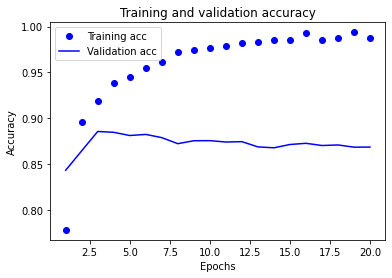

In [67]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_4["accuracy"]
val_acc = history_dict_4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
     

5.Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

In [68]:
model_5 = keras.Sequential([
    #layers.Dropout(0.2),                        
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(15, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [69]:
# Compiling the model

model_5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [70]:
history_5 = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
     

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5449 - accuracy: 0.7403 - val_loss: 0.3926 - val_accuracy: 0.8666
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3529 - accuracy: 0.8738 - val_loss: 0.3106 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2640 - accuracy: 0.9091 - val_loss: 0.2807 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2216 - accuracy: 0.9237 - val_loss: 0.2795 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1820 - accuracy: 0.9368 - val_loss: 0.2782 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1557 - accuracy: 0.9482 - val_loss: 0.2900 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1305 - accuracy: 0.9578 - val_loss: 0.3515 - val_accuracy: 0.8721
Epoch 8/20
30

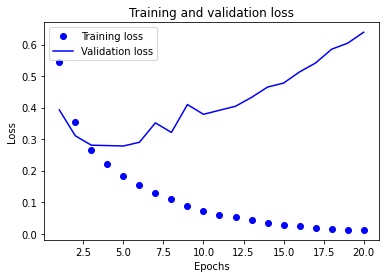

In [71]:
history_dict_5 = history_5.history
loss_values = history_dict_5["loss"]
val_loss_values = history_dict_5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

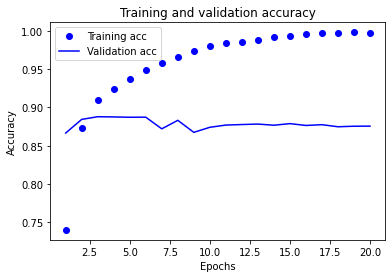

In [72]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_5["accuracy"]
val_acc = history_dict_5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()